## Loading the Breast Cancer Wisconsin dataset

In [7]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
#col_names = ['id', 'diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
wdbc_df = pd.read_csv(url, header=None)
wdbc_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
wdbc_df.shape

(569, 32)

In [9]:
from sklearn.preprocessing import LabelEncoder
X = wdbc_df.loc[:, 2:]
y = wdbc_df.loc[:, 1]
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [11]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion = "gini", max_depth =5, min_samples_leaf = 20)
dtree = dtree.fit(X_train, y_train)
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by=['Imp'], ascending = False))

         Imp
29  0.808212
22  0.153627
25  0.017912
15  0.017842
23  0.002407
2   0.000000
18  0.000000
30  0.000000
28  0.000000
27  0.000000
26  0.000000
24  0.000000
21  0.000000
20  0.000000
19  0.000000
17  0.000000
3   0.000000
16  0.000000
14  0.000000
13  0.000000
12  0.000000
11  0.000000
10  0.000000
9   0.000000
8   0.000000
7   0.000000
6   0.000000
5   0.000000
4   0.000000
31  0.000000


In [12]:
print('Test Accuracy: %.3f' % dtree.score(X_test, y_test))
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict(X_test)

Test Accuracy: 0.930


In [13]:
dotfile = tree.export_graphviz(dtree, out_file = "./wbdc_dtree.dot", feature_names = X_train.columns)

In [23]:
#from os import system
#system("dot -Tpng ./wbdc_dtree.dot -o ./wbdc_dtree.png")

1

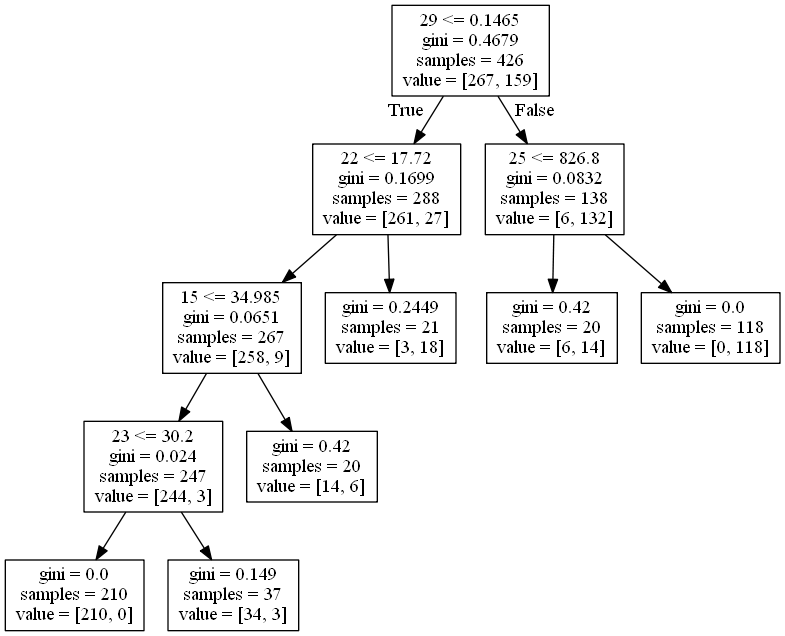

In [25]:
from IPython.display import Image
Image(filename='./dtree2.png', width=800)

In [26]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin_fold', 'serum_insulin', 'bmi', 'pedigree', 'age', 'label']
pima_df = pd.read_csv(url, header=None, names=col_names)
pima_df.head(5)

,pregnant,glucose,bp,skin_fold,serum_insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
pima_df.shape

(768, 9)

In [30]:
X = pima_df.drop('label', axis = 1)
y = pima_df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [32]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth =5, min_samples_leaf = 20)
dtree = dtree.fit(X_train, y_train)
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by=['Imp'], ascending = False))

                    Imp
glucose        0.496710
bmi            0.212888
age            0.172912
pedigree       0.072643
bp             0.020874
pregnant       0.018436
serum_insulin  0.005537
skin_fold      0.000000


In [33]:
print('Test Accuracy: %.3f' % dtree.score(X_test, y_test))
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict(X_test)

Test Accuracy: 0.771


In [34]:
from os import system
#dotfile = open("./dtree2.dot", 'w')
dotfile = tree.export_graphviz(dtree, out_file = "./pima_dtree.dot", feature_names = X_train.columns)
#dotfile.close()

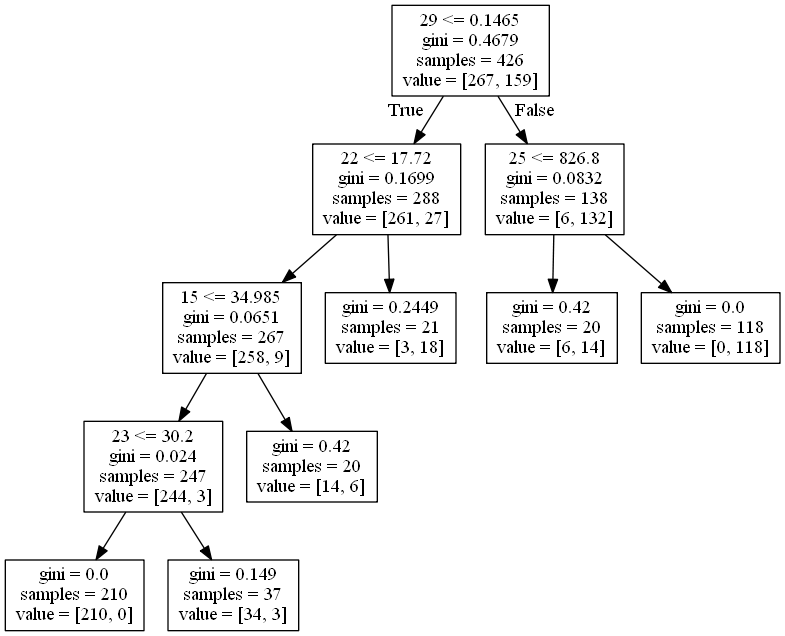

In [35]:
#from IPython.display import Image
Image(filename='./dtree2.png', width=800)